In [72]:
%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2

import skimage.io as sk
from Functions import image_processing as ip
from Functions import region_merging as rm
from Functions import seeded_region_growing as srg
from Functions import seed_detection as sd
from Functions import dice_score as ds
from Functions import old_seeded_region_growing as o_srg
from PIL import Image

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


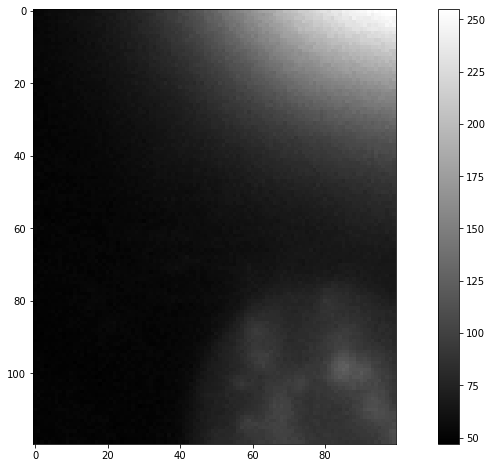

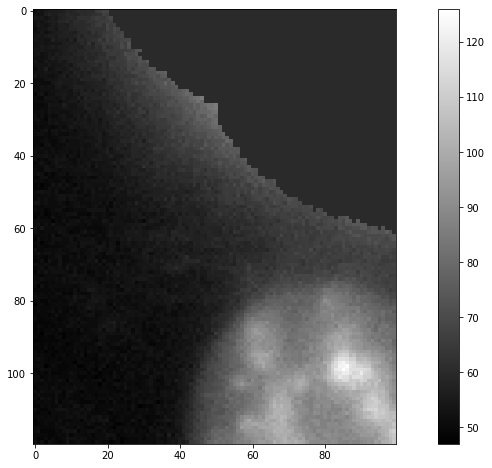

In [211]:
image_intensity = sk.imread("Data/NIH3T3/img/dna-42.png")
image_intensity_small = image_intensity[730:850, 1200:1300]
img_removed_spots = ip.remove_bright_spots_with_border(image_intensity_small, 130, 60, 30)
ip.show_image(image_intensity_small, 15, 8)
ip.show_image(img_removed_spots, 15, 8)

0.4588235294117647


C:\Users\marie\Documents\Studium\Semester4\Bioinfo\Projekt\Functions\seed_detection.py:50: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / (img[p] + 0.000001))


0.5799696180555556


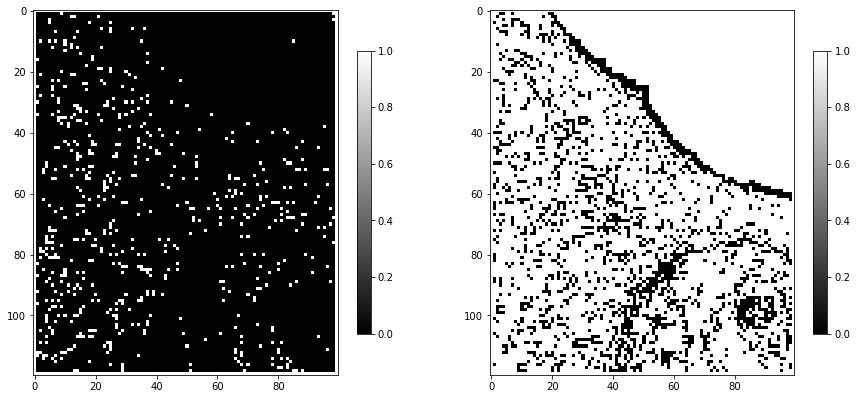

In [212]:
image_seeds = sd.seeds(image_intensity_small, 0.05)
image_p_seeds = sd.seeds(img_removed_spots, 0.05)
ip.show_two_images_colorbar(image_seeds, image_p_seeds, 0.65)

In [213]:
image_regions = sd.seed_merging(image_seeds)
image_regions_p = sd.seed_merging(image_p_seeds)

In [214]:
#image_srg = srg.region_growing(image_intensity_small, image_regions.copy())
#ip.show_image(image_intensity_small, 15, 8)
image_srg_p = srg.region_growing(img_removed_spots, image_regions_p.copy())
#ip.show_two_images_colorbar(image_srg, image_srg_p, 0.65)

450.0
100
200
300
400
5


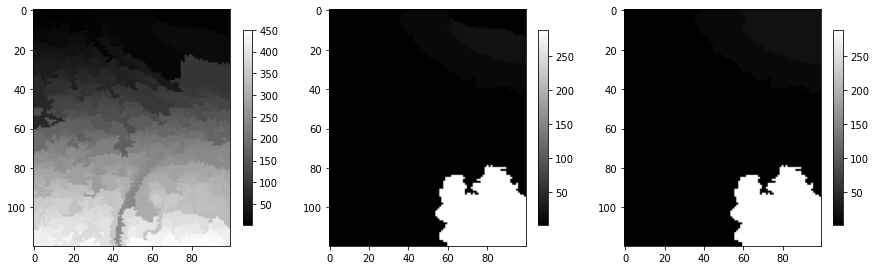

In [6]:
results_region_merging_similarity = rm.distance_merging_while(image_srg.copy(), 0.1, image_intensity_small)
image_rm_similarity, inter_region_neighbors, means = results_region_merging_similarity
image_rm_size = rm.region_merging_size(image_intensity_small, image_rm_similarity.copy(), inter_region_neighbors, means, 400)
ip.show_three_images_colorbar(image_srg, image_rm_similarity, image_rm_size, 0.45)

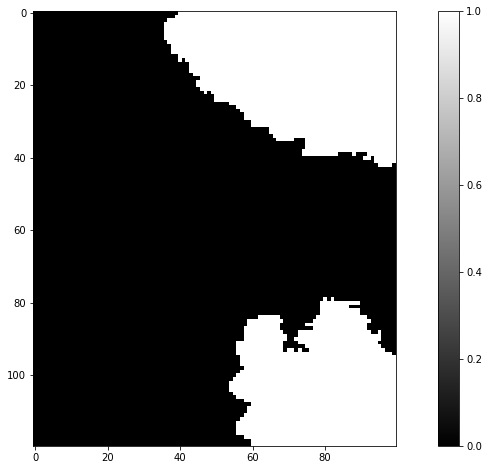

In [7]:
background_number = ds.find_background_number(image_rm_size.copy())
clipped_segmented_image = ds.segmented_image_clip(image_rm_size.copy(), background_number)
ip.show_image(clipped_segmented_image, 15, 8)

322.0
100
200
300
3


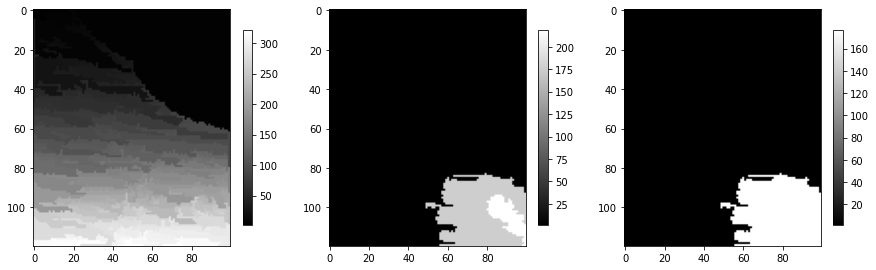

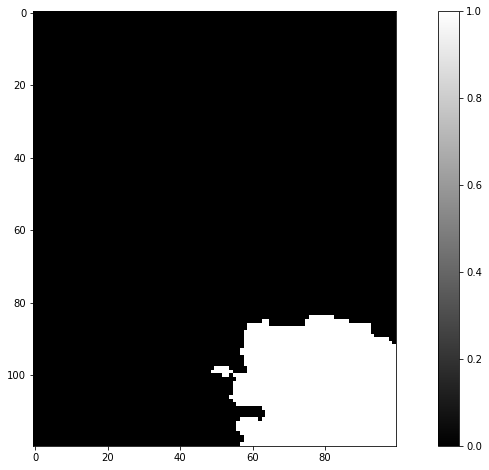

In [225]:
results_region_merging_similarity_p = rm.distance_merging_while(image_srg_p.copy(), 0.119, img_removed_spots)
image_rm_similarity_p, inter_region_neighbors_p, means_p = results_region_merging_similarity_p
image_rm_size_p = rm.region_merging_size(img_removed_spots, image_rm_similarity_p.copy(), inter_region_neighbors_p, means_p, 400)
ip.show_three_images_colorbar(image_srg_p, image_rm_similarity_p, image_rm_size_p, 0.45)
background_number_p = ds.find_background_number(image_rm_size_p.copy())
clipped_segmented_image_p = ds.segmented_image_clip(image_rm_size_p.copy(), background_number_p)
ip.show_image(ip.median_filter(clipped_segmented_image_p, 3), 15, 8)

In [9]:
im = Image.fromarray(clipped_segmented_image_p)
im.save("../Result_Pictures/Seeded_Region_Growing/NIH3T3/dna-42_part_bright-spots-removed_final")

ValueError: unknown file extension: 

In [ ]:
im1 = Image.fromarray(clipped_segmented_image)
im1.save("../Result_Pictures/Seeded_Region_Growing/NIH3T3/dna-42_part_bright-spots_final")

0.35050071530758226


C:\Users\marie\Documents\Studium\Semester4\Bioinfo\Projekt\Functions\seed_detection.py:50: RuntimeWarning: overflow encountered in ushort_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / (img[p] + 0.000001))


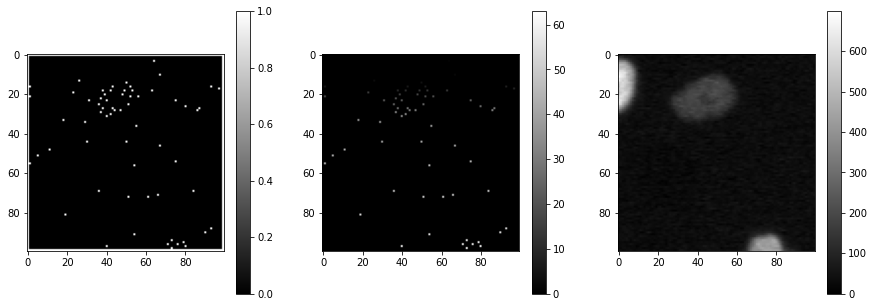

In [69]:
image_intensity = sk.imread("Data/N2DL-HeLa/img/t52.tif")[300:400, 300:400]
img_gt = sk.imread("Data/N2DL-HeLa/gt/man_seg52.tif")[300:400, 300:400]
#image_intensity = ip.subtract_minimum(image_intensity)

image_seeds = sd.seeds(image_intensity, 0.3)
#image_seeds_s = Image.fromarray(image_seeds)
#image_seeds_s.save("../Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/t01_seeds.tif")
image_for_srg = sd.seed_merging(image_seeds.copy())
#image_for_srg = sd.reduce_region_number(image_for_srg,2)
ip.show_three_images_colorbar(image_seeds, image_for_srg, image_intensity, 0.65)

5000


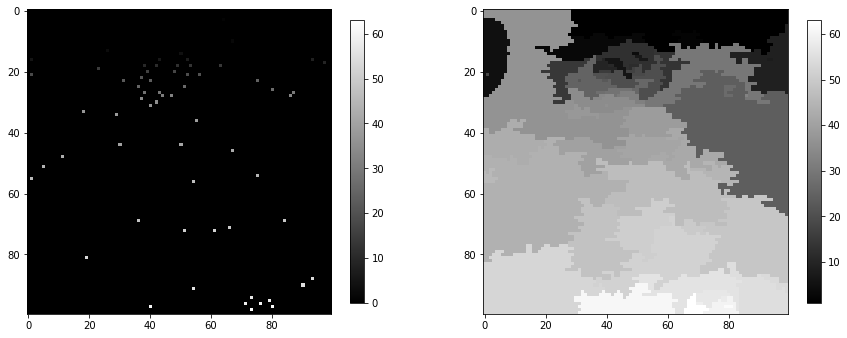

In [70]:
image_srg = srg.region_growing(image_intensity, image_for_srg.copy())
#image_srg_s = Image.fromarray(image_srg)
#image_srg_s.save("../Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/t01_srg.tif")
ip.show_two_images_colorbar(image_for_srg, image_srg, 0.65)

63.0
6


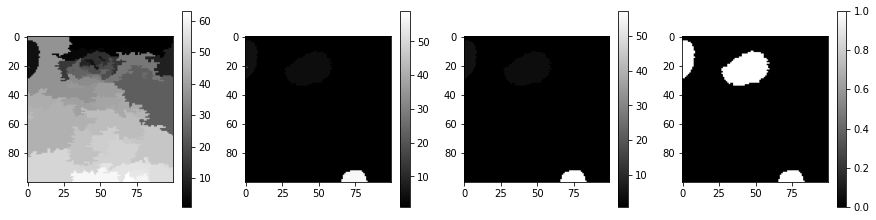

In [71]:
results_region_merging_similarity = rm.distance_merging_while(image_srg.copy(), 0.1, image_intensity)
image_rm_similarity, inter_region_neighbors, means = results_region_merging_similarity
image_rm_size = rm.region_merging_size(image_intensity, image_rm_similarity.copy(), inter_region_neighbors, means, 100)
image_final = ds.final_clipping(image_rm_size.copy())
ip.show_four_images_colorbar(image_srg, image_rm_similarity, image_rm_size, image_final, 0.45)



In [ ]:
image_merged = rm.region_merging(image_srg.copy(), image_intensity, 0.01, 400)
#image_merged_s = Image.fromarray(image_merged)
#image_merged_s.save("../Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/t01_merged.tif")

image_final = ds.final_clipping(image_merged.copy())
#image_final_s = Image.fromarray(image_merged)
#image_final_s.save("../Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/t01_final.tif")

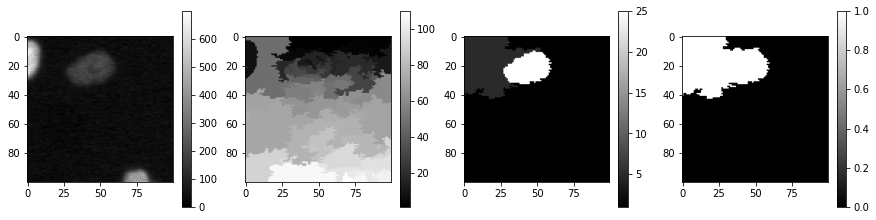

In [59]:
ip.show_four_images_colorbar(image_intensity, image_srg, image_merged, image_final, 0.45)

In [68]:
print(ds.evaluate_accuracy_unweighted(image_rm_size.copy(), img_gt), ds.evaluate_accuracy_weighted(image_rm_size.copy(), img_gt))

0.9865 0.9571309776604444
